# Comparative Analysis
In this notebook, we compare Window with different parameter settings.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
sys.path.append("../../")

from tqdm import tqdm
from itertools import product

In [3]:
from src.visualizer import plot_profile, plot_profile_with_ts

Let's choose a score for evaluation (F1 or Covering).

In [4]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [5]:
cost = "rank"
thresholds = np.round(np.arange(.05, 1., .05), 2)

methods = list()

for t in thresholds:
    candidate_name = f"{cost}-cost-{t}-threshold"
    methods.append((candidate_name, f"{candidate_name}.csv"))

for idx, (name, file_name) in enumerate(methods):
    methods[idx] = name, pd.read_csv(f"../../experiments/window_cost_threshold/{file_name}")
    
df_scores = pd.DataFrame()

for name, df in methods:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]
    
df_scores

,dataset,rank-cost-0.05-threshold,rank-cost-0.1-threshold,rank-cost-0.15-threshold,rank-cost-0.2-threshold,rank-cost-0.25-threshold,rank-cost-0.3-threshold,rank-cost-0.35-threshold,rank-cost-0.4-threshold,rank-cost-0.45-threshold,rank-cost-0.5-threshold,rank-cost-0.55-threshold,rank-cost-0.6-threshold,rank-cost-0.65-threshold,rank-cost-0.7-threshold,rank-cost-0.75-threshold,rank-cost-0.8-threshold,rank-cost-0.85-threshold,rank-cost-0.9-threshold,rank-cost-0.95-threshold
0,DodgerLoopDay,0.060,0.052,0.047,0.038,0.038,0.050,0.062,0.062,0.061,0.049,0.049,0.063,0.063,0.062,0.062,0.062,0.061,0.061,0.060
1,EEGRat,0.090,0.192,0.316,0.546,0.597,0.564,0.559,0.560,0.607,0.608,0.609,0.608,0.608,0.677,0.703,0.704,0.705,0.729,0.729
2,EEGRat2,0.158,0.301,0.496,0.675,0.590,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500,0.500
3,FaceFour,0.426,0.497,0.496,0.504,0.503,0.450,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281,0.281
4,GrandMalSeizures2,0.165,0.260,0.314,0.317,0.479,0.482,0.526,0.526,0.539,0.624,0.416,0.427,0.444,0.445,0.445,0.445,0.446,0.446,0.446
5,GreatBarbet1,0.759,0.926,0.688,0.713,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355,0.355
6,Herring,0.021,0.031,0.032,0.077,0.180,0.283,0.401,0.401,0.445,0.554,0.554,0.554,0.554,0.554,1.000,1.000,1.000,1.000,1.000
7,InlineSkate,0.050,0.057,0.066,0.070,0.071,0.070,0.073,0.074,0.084,0.095,0.095,0.121,0.121,0.136,0.136,0.136,0.136,0.157,0.157
8,InsectEPG1,0.170,0.341,0.529,0.884,0.928,0.888,0.883,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653,0.653
9,MelbournePedestrian,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149,0.149


Let's calculate the mean/std score.

In [6]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_922/2219294936.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


rank-cost-0.05-threshold    0.209
rank-cost-0.1-threshold     0.292
rank-cost-0.15-threshold    0.318
rank-cost-0.2-threshold     0.371
rank-cost-0.25-threshold    0.396
rank-cost-0.3-threshold     0.394
rank-cost-0.35-threshold    0.414
rank-cost-0.4-threshold     0.409
rank-cost-0.45-threshold    0.409
rank-cost-0.5-threshold     0.421
rank-cost-0.55-threshold    0.414
rank-cost-0.6-threshold     0.405
rank-cost-0.65-threshold    0.402
rank-cost-0.7-threshold     0.406
rank-cost-0.75-threshold    0.422
rank-cost-0.8-threshold     0.422
rank-cost-0.85-threshold    0.422
rank-cost-0.9-threshold     0.424
rank-cost-0.95-threshold    0.426
dtype: float64

In [7]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_922/1084607075.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


rank-cost-0.05-threshold    0.195
rank-cost-0.1-threshold     0.256
rank-cost-0.15-threshold    0.237
rank-cost-0.2-threshold     0.252
rank-cost-0.25-threshold    0.248
rank-cost-0.3-threshold     0.230
rank-cost-0.35-threshold    0.246
rank-cost-0.4-threshold     0.234
rank-cost-0.45-threshold    0.213
rank-cost-0.5-threshold     0.220
rank-cost-0.55-threshold    0.218
rank-cost-0.6-threshold     0.197
rank-cost-0.65-threshold    0.194
rank-cost-0.7-threshold     0.197
rank-cost-0.75-threshold    0.232
rank-cost-0.8-threshold     0.232
rank-cost-0.85-threshold    0.233
rank-cost-0.9-threshold     0.233
rank-cost-0.95-threshold    0.233
dtype: float64

Let's compute the wins per method.

In [8]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [9]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 5)}")

rank-cost-0.05-threshold:wins=4 rank=12.7619
rank-cost-0.1-threshold:wins=6 rank=11.04762
rank-cost-0.15-threshold:wins=5 rank=10.95238
rank-cost-0.2-threshold:wins=6 rank=9.04762
rank-cost-0.25-threshold:wins=7 rank=6.47619
rank-cost-0.3-threshold:wins=5 rank=6.66667
rank-cost-0.35-threshold:wins=5 rank=5.57143
rank-cost-0.4-threshold:wins=6 rank=5.33333
rank-cost-0.45-threshold:wins=5 rank=5.0
rank-cost-0.5-threshold:wins=6 rank=4.57143
rank-cost-0.55-threshold:wins=8 rank=4.61905
rank-cost-0.6-threshold:wins=7 rank=4.38095
rank-cost-0.65-threshold:wins=6 rank=4.85714
rank-cost-0.7-threshold:wins=5 rank=4.28571
rank-cost-0.75-threshold:wins=6 rank=4.2381
rank-cost-0.8-threshold:wins=6 rank=4.28571
rank-cost-0.85-threshold:wins=6 rank=4.42857
rank-cost-0.9-threshold:wins=8 rank=4.2381
rank-cost-0.95-threshold:wins=8 rank=4.04762


Let's plot and output the ranks.

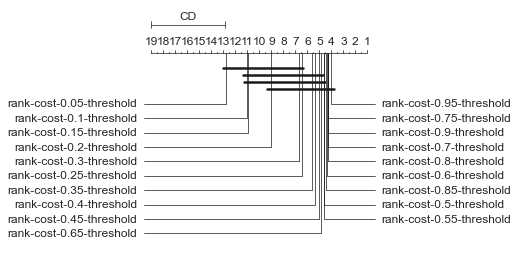

In [10]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, ranks.columns, cd=cd, reverse=True, width=5, filename=f"../../figures/cd_ablation_window_{cost}_threshold.pdf")

Let's compute wins/losses against ClaSP.

In [11]:
selection = "rank-cost-0.85-threshold"

for rival in df_scores.columns[1:]:
    if rival == selection: continue
    
    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=False)
    
    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

rank-cost-0.85-threshold vs rank-cost-0.05-threshold: (wins/ties/losses): 13/4/4
rank-cost-0.85-threshold vs rank-cost-0.1-threshold: (wins/ties/losses): 12/4/5
rank-cost-0.85-threshold vs rank-cost-0.15-threshold: (wins/ties/losses): 12/4/5
rank-cost-0.85-threshold vs rank-cost-0.2-threshold: (wins/ties/losses): 10/4/7
rank-cost-0.85-threshold vs rank-cost-0.25-threshold: (wins/ties/losses): 7/6/8
rank-cost-0.85-threshold vs rank-cost-0.3-threshold: (wins/ties/losses): 7/9/5
rank-cost-0.85-threshold vs rank-cost-0.35-threshold: (wins/ties/losses): 5/11/5
rank-cost-0.85-threshold vs rank-cost-0.4-threshold: (wins/ties/losses): 5/12/4
rank-cost-0.85-threshold vs rank-cost-0.45-threshold: (wins/ties/losses): 4/14/3
rank-cost-0.85-threshold vs rank-cost-0.5-threshold: (wins/ties/losses): 5/13/3
rank-cost-0.85-threshold vs rank-cost-0.55-threshold: (wins/ties/losses): 5/13/3
rank-cost-0.85-threshold vs rank-cost-0.6-threshold: (wins/ties/losses): 4/13/4
rank-cost-0.85-threshold vs rank-cos

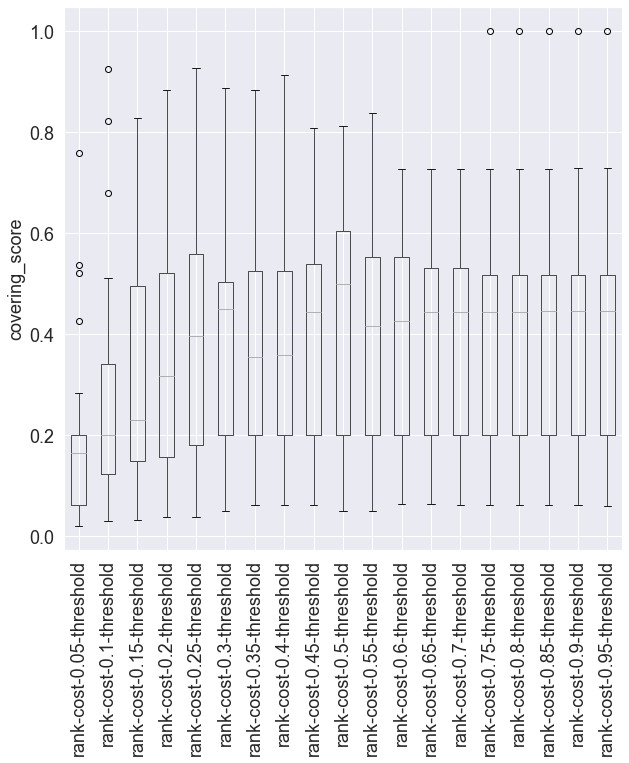

In [12]:
fontsize = 18
_, ax = plt.subplots(figsize=(10,10))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel(eval_score, fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)
    
plt.savefig(f"../../figures/bp_ablation_window_{cost}_threshold.pdf", bbox_inches="tight") 